In [13]:
import sys
sys.path.append('/sbnd/app/users/brindenc/mypython') #My utils path
from bc_utils.CAFana import pic as CAFpic
from bc_utils.CAFana import plotters as CAFplotters
from bc_utils.utils import pic,plotters
from time import time
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from datetime import date

%load_ext autoreload
%autoreload 2

plt.style.use(['science','no-latex'])
day = date.today().strftime("%Y_%m_%d")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#Constants/parameters
pot1 = 50e16
DATA_DIR = '/sbnd/data/users/brindenc/analyze_sbnd/nue/v09_58_02/'
xls = 20 #axis size
tls = 20 #title size
lls = 16 #legend size

In [3]:
#Get data
nue_reco_cuts = pd.read_csv(f'{DATA_DIR}reco_cuts_nue.csv')
nuecc_reco_cuts = pd.read_csv(f'{DATA_DIR}reco_cuts_nuecc.csv')
nue_truth_cuts = pd.read_csv(f'{DATA_DIR}truth_cuts_nue.csv')
nuecc_truth_cuts = pd.read_csv(f'{DATA_DIR}truth_cuts_nuecc.csv')

shwconfusion_nue = genfromtxt(f'{DATA_DIR}shwconfusion_n0_nue.csv',delimiter=',')
shwconfusion_nuecc = genfromtxt(f'{DATA_DIR}shwconfusion_n0_nuecc.csv',delimiter=',')
trkconfusion_nue = genfromtxt(f'{DATA_DIR}trkconfusion_n0_nue.csv',delimiter=',')
trkconfusion_nuecc = genfromtxt(f'{DATA_DIR}trkconfusion_n0_nuecc.csv',delimiter=',')

shwconfusion_nue_mean = genfromtxt(f'{DATA_DIR}shwconfusion_mean_nue.csv',delimiter=',')
shwconfusion_nuecc_mean = genfromtxt(f'{DATA_DIR}shwconfusion_mean_nuecc.csv',delimiter=',')
trkconfusion_nue_mean = genfromtxt(f'{DATA_DIR}trkconfusion_mean_nue.csv',delimiter=',')
trkconfusion_nuecc_mean = genfromtxt(f'{DATA_DIR}trkconfusion_mean_nuecc.csv',delimiter=',')

In [4]:
#nu + e
nue_tree1 = uproot.open(f'{DATA_DIR}CAFnue1.root:recTree;1')
CAFkeys = nue_tree1.keys()
mcnu_keys = [key for key in CAFkeys if CAFpic.mcnuprefix in key]
shw_keys = [key for key in CAFkeys if CAFpic.shwprefix in key]
trk_keys = [key for key in CAFkeys if CAFpic.trkprefix in key]
reco_keys = [key for key in CAFkeys if CAFpic.recoprefix in key]

nue_mc = CAFpic.get_df(nue_tree1,mcnu_keys)
nue_nreco = CAFpic.get_df(nue_tree1,[f'{CAFpic.recoprefix}nshw',f'{CAFpic.recoprefix}ntrk',f'{CAFpic.recoprefix}nstub']) #Make seperate tree to count reco objects
nue_reco = CAFpic.get_df(nue_tree1,reco_keys)

nue_mc = [df.sort_index() for df in nue_mc]
nue_reco = [df.sort_index() for df in nue_reco]
nue_nreco = nue_nreco.sort_index()

#nuecc
nuecc_tree1 = uproot.open(f'{DATA_DIR}CAFnuecc1.root:recTree;1')
CAFkeys = nuecc_tree1.keys()

mcnu_keys = [key for key in CAFkeys if CAFpic.mcnuprefix in key]
shw_keys = [key for key in CAFkeys if CAFpic.shwprefix in key]
trk_keys = [key for key in CAFkeys if CAFpic.trkprefix in key]
reco_keys = [key for key in CAFkeys if CAFpic.recoprefix in key]

nuecc_mc = CAFpic.get_df(nuecc_tree1,mcnu_keys)
nuecc_nreco = CAFpic.get_df(nuecc_tree1,[f'{CAFpic.recoprefix}nshw',f'{CAFpic.recoprefix}ntrk',f'{CAFpic.recoprefix}nstub']) #Make seperate tree to count reco objects
nuecc_reco = CAFpic.get_df(nuecc_tree1,reco_keys)

nuecc_mc = [df.sort_index() for df in nuecc_mc]
nuecc_nreco = nuecc_nreco.sort_index()
nuecc_reco = [df.sort_index() for df in nuecc_reco]

In [5]:
#Find indeces with proper keys, since we have multiple dfs, we should find index with key we're interested
iscc_nuecc_index = CAFpic.find_index_with_key(nuecc_mc,f'{CAFpic.mcnuprefix}iscc') #same as truth pdg
razzle_nuecc_index = CAFpic.find_index_with_key(nuecc_reco,f'{CAFpic.shwprefix}razzle.electronScore')
pdg_nuecc_index = CAFpic.find_index_with_key(nuecc_mc,f'{CAFpic.primprefix}pdg')

iscc_nue_index = CAFpic.find_index_with_key(nue_mc,f'{CAFpic.mcnuprefix}iscc') #same as truth pdg
razzle_nue_index = CAFpic.find_index_with_key(nue_reco,f'{CAFpic.shwprefix}razzle.electronScore')
pdg_nue_index = CAFpic.find_index_with_key(nue_mc,f'{CAFpic.primprefix}pdg')

In [6]:
n = nue_reco_cuts.shape[0]-2 #Number of universes sampled

In [7]:
#Redefine labels for pretiness
recolabels = list(nue_reco_cuts.keys())
recolabels[2] = r'$n_{shw} = 1$'
recolabels[3] = r'$n_{trk} = 0$'
recolabels[4] = r'e- razzle $< 0.6$'
recolabels[5] = r'$E\theta^2 < 0.003$ '+'\n'+r'[Gev rad$^2$]'
recolabels[6] = r'$E\theta^2 < 0.004$'+'\n'+r'[Gev rad$^2$]'

truthlabels = list(nue_truth_cuts.keys())


In [8]:
#Signal mean and std
  # smean = signal.iloc[-1]
  # sstd = signal.iloc[-2]

In [9]:
recocolumns_solid = [1,2,3,4]
recocolumns_dashed = [4,5,6]
truthcolumns_solid = [1,2,3,4,5]
truthcolumns_ddash = [6,7,8,9]
truthcolumns_dashed = [10,11]

In [10]:
recocolumns = [1,2,3,4,5,6]
truthcolumns = [1,2,3,4,5,6,7,8,9,10,11]

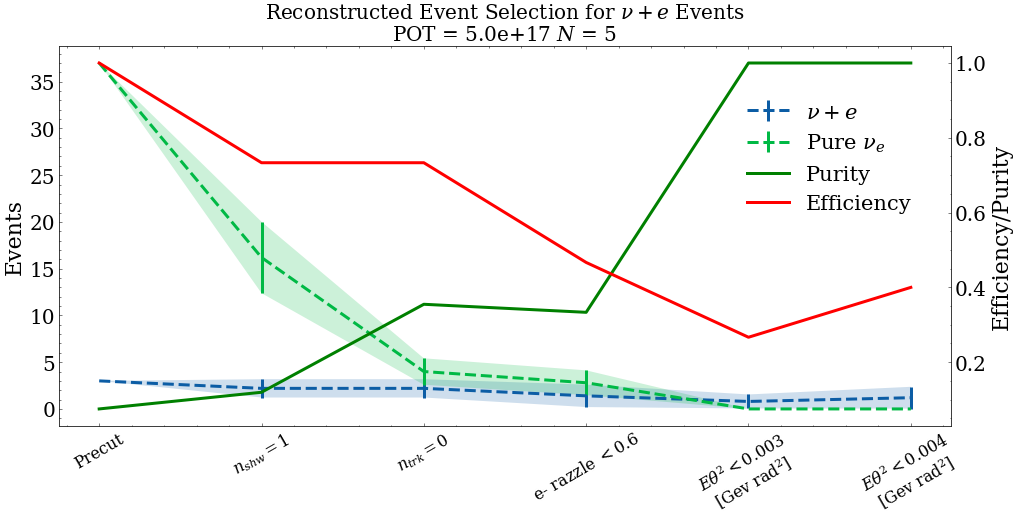

In [11]:
#RECO
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot()
ax2=ax.twinx()
ln1 = ax.errorbar(recocolumns,nue_reco_cuts.iloc[-1,recocolumns],yerr=nue_reco_cuts.iloc[-2,recocolumns],
  label=r'$\nu+e$',linewidth=3,linestyle='--')
ln2 = ax.errorbar(recocolumns,nuecc_reco_cuts.iloc[-1,recocolumns],yerr=nuecc_reco_cuts.iloc[-2,recocolumns],
  label=r'Pure $\nu_e$',linewidth=3,linestyle='--')
ln3 = ax2.plot(recocolumns,nue_reco_cuts.iloc[-1,recocolumns]/(nuecc_reco_cuts.iloc[-1,recocolumns]+nue_reco_cuts.iloc[-1,recocolumns]),
  label='Purity',linewidth=3,color='green')
ln4 = ax2.plot(recocolumns,nue_reco_cuts.iloc[-1,recocolumns]/nue_reco_cuts.iloc[-1,1],
  label='Efficiency',linewidth=3,color='red')
ax.fill_between(recocolumns, nue_reco_cuts.iloc[-1,recocolumns]-nue_reco_cuts.iloc[-2,recocolumns],
  nue_reco_cuts.iloc[-1,recocolumns]+nue_reco_cuts.iloc[-2,recocolumns],alpha=0.2)
ax.fill_between(recocolumns, nuecc_reco_cuts.iloc[-1,recocolumns]-nuecc_reco_cuts.iloc[-2,recocolumns],
  nuecc_reco_cuts.iloc[-1,recocolumns]+nuecc_reco_cuts.iloc[-2,recocolumns],alpha=0.2)


#Set labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2,fontsize=lls+5,bbox_to_anchor=[0.75, 0.9])

plt.xticks(recocolumns,[recolabels[i] for i in recocolumns])
plt.setp(ax.get_xticklabels(), fontsize=16,rotation=30)
plt.setp(ax.get_yticklabels(), fontsize=xls)
plt.setp(ax2.get_yticklabels(), fontsize=xls)

ax.set_ylabel('Events',fontsize=xls+2)
ax2.set_ylabel('Efficiency/Purity',fontsize=xls+2)
ax.set_title(r'Reconstructed Event Selection for $\nu+e$ Events'+'\n'+f'POT = {pot1:.1e}'+r' $N$ = '+f'{n:.0f}',
  fontsize=tls)
plotters.save_plot(f'reco{n}')


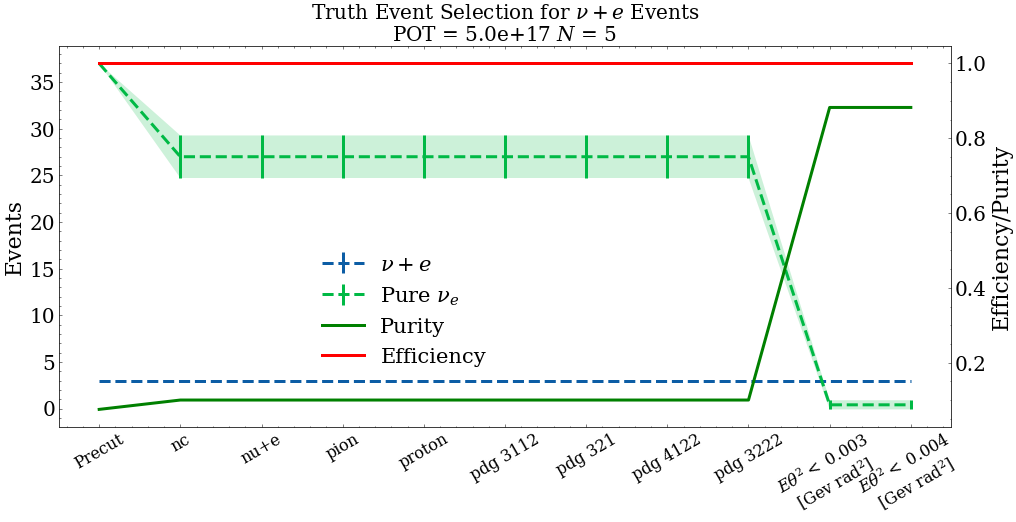

In [12]:
#TRUTH
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot()
ax2=ax.twinx()
ln1 = ax.errorbar(truthcolumns,nue_truth_cuts.iloc[-1,truthcolumns],yerr=nue_truth_cuts.iloc[-2,truthcolumns],
  label=r'$\nu+e$',linewidth=3,linestyle='--')
ln2 = ax.errorbar(truthcolumns,nuecc_truth_cuts.iloc[-1,truthcolumns],yerr=nuecc_truth_cuts.iloc[-2,truthcolumns],
  label=r'Pure $\nu_e$',linewidth=3,linestyle='--')
ln3 = ax2.plot(truthcolumns,nue_truth_cuts.iloc[-1,truthcolumns]/(nuecc_truth_cuts.iloc[-1,truthcolumns]+nue_truth_cuts.iloc[-1,truthcolumns]),
  label='Purity',linewidth=3,color='green')
ln4 = ax2.plot(truthcolumns,nue_truth_cuts.iloc[-1,truthcolumns]/nue_truth_cuts.iloc[-1,1],
  label='Efficiency',linewidth=3,color='red')
ax.fill_between(truthcolumns, nue_truth_cuts.iloc[-1,truthcolumns]-nue_truth_cuts.iloc[-2,truthcolumns],
  nue_truth_cuts.iloc[-1,truthcolumns]+nue_truth_cuts.iloc[-2,truthcolumns],alpha=0.2)
ax.fill_between(truthcolumns, nuecc_truth_cuts.iloc[-1,truthcolumns]-nuecc_truth_cuts.iloc[-2,truthcolumns],
  nuecc_truth_cuts.iloc[-1,truthcolumns]+nuecc_truth_cuts.iloc[-2,truthcolumns],alpha=0.2)


#Set labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2,fontsize=lls+5,bbox_to_anchor=[0.5, 0.5])

plt.xticks(truthcolumns,[truthlabels[i] for i in truthcolumns])
plt.setp(ax.get_xticklabels(), fontsize=16,rotation=30)
plt.setp(ax.get_yticklabels(), fontsize=xls)
plt.setp(ax2.get_yticklabels(), fontsize=xls)

ax.set_ylabel('Events',fontsize=xls+2)
ax2.set_ylabel('Efficiency/Purity',fontsize=xls+2)
ax.set_title(r'Truth Event Selection for $\nu+e$ Events'+'\n'+f'POT = {pot1:.1e}'+r' $N$ = '+f'{n:.0f}',
  fontsize=tls)
plotters.save_plot(f'truth{n}')

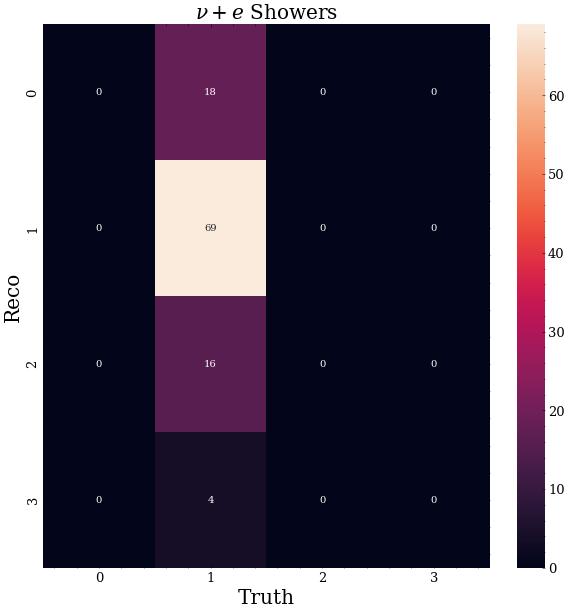

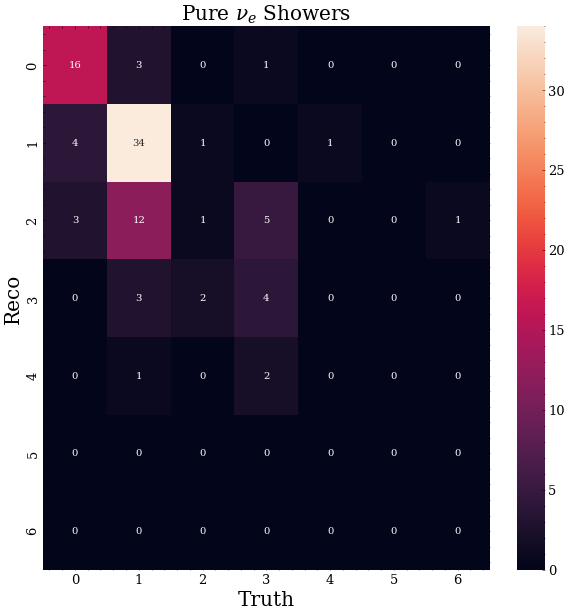

In [223]:
#Select confusion mat to plot
shwconfusion_nue_all = CAFpic.get_shw_confusion_matrix(nue_nreco,nue_mc[pdg_nue_index],n=10)
shwconfusion_nuecc_all = CAFpic.get_shw_confusion_matrix(nuecc_nreco,nuecc_mc[pdg_nuecc_index],n=20)
plt.figure(figsize=(10,10))
sns.heatmap(shwconfusion_nue_all[:4,:4],annot=True)
plt.xlabel(r'Truth',fontsize=xls)
plt.ylabel(r'Reco',fontsize=xls)
plt.title(r'$\nu+e$ Showers',fontsize=tls)
plotters.save_plot('nue_scat_showers')

plt.figure(figsize=(10,10))
sns.heatmap(shwconfusion_nuecc_all[:7,:7],annot=True)
plt.xlabel(r'Truth',fontsize=xls)
plt.ylabel(r'Reco',fontsize=xls)
plt.title(r'Pure $\nu_e$ Showers',fontsize=tls)
plotters.save_plot('nuecc_showers')


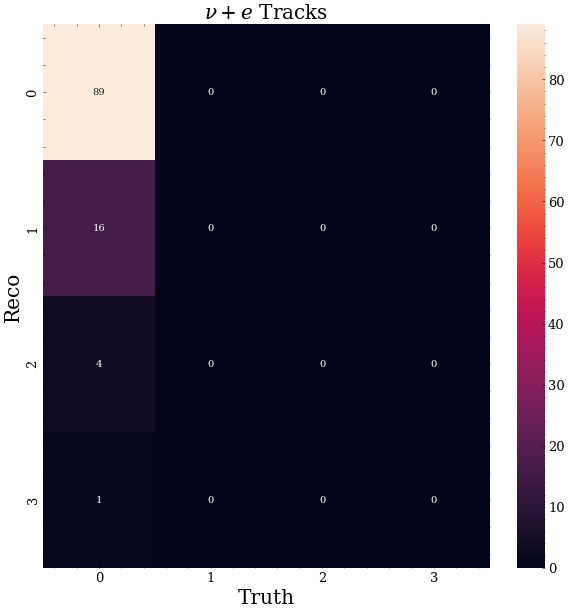

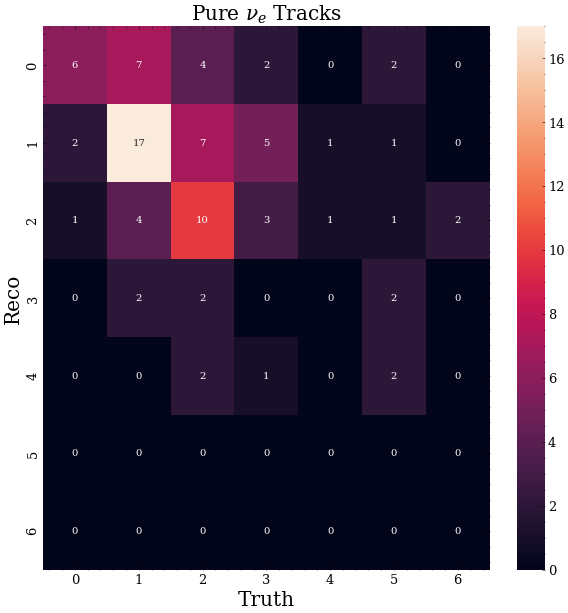

In [224]:
trkconfusion_nue_all = CAFpic.get_trk_confusion_matrix(nue_nreco,nue_mc[pdg_nue_index],n=20)
trkconfusion_nuecc_all = CAFpic.get_trk_confusion_matrix(nuecc_nreco,nuecc_mc[pdg_nuecc_index],n=20)
plt.figure(figsize=(10,10))
sns.heatmap(trkconfusion_nue_all[:4,:4],annot=True)
plt.xlabel(r'Truth',fontsize=xls)
plt.ylabel(r'Reco',fontsize=xls)
plt.title(r'$\nu+e$ Tracks',fontsize=tls)
plotters.save_plot('nue_scat_tracks')

plt.figure(figsize=(10,10))
sns.heatmap(trkconfusion_nuecc_all[:7,:7],annot=True)
plt.xlabel(r'Truth',fontsize=xls)
plt.ylabel(r'Reco',fontsize=xls)
plt.title(r'Pure $\nu_e$ Tracks',fontsize=tls)
plotters.save_plot('nuecc_tracks')

In [236]:
shwconfusion_nue_mean

,0.000000000000000000e+00,2.000000000000000111e-01,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,0.000000000000000000e+00.10,0.000000000000000000e+00.11,0.000000000000000000e+00.12,0.000000000000000000e+00.13,0.000000000000000000e+00.14,0.000000000000000000e+00.15,0.000000000000000000e+00.16,0.000000000000000000e+00.17,0.000000000000000000e+00.18
0,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


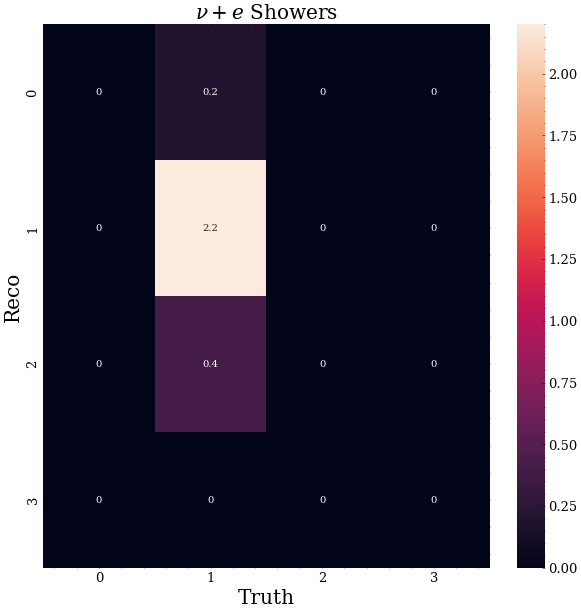

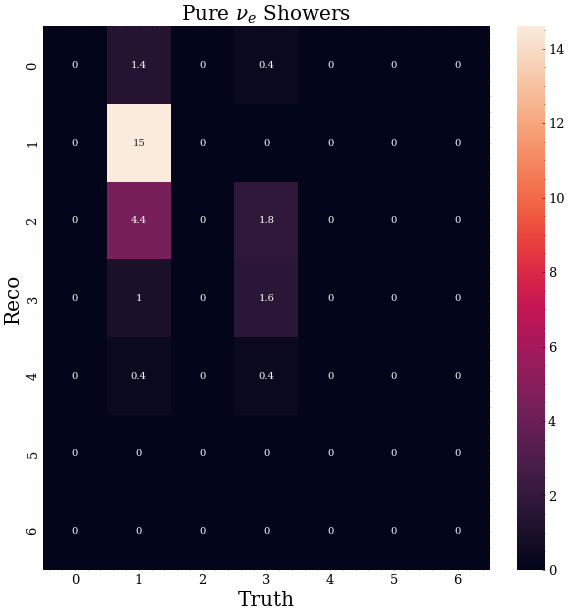

In [241]:
plt.figure(figsize=(10,10))
sns.heatmap(shwconfusion_nue_mean[:4,:4],annot=True)
plt.xlabel(r'Truth',fontsize=xls)
plt.ylabel(r'Reco',fontsize=xls)
plt.title(r'$\nu+e$ Showers',fontsize=tls)
plotters.save_plot('nue_scat_showers_mean')

plt.figure(figsize=(10,10))
sns.heatmap(shwconfusion_nuecc_mean[:7,:7],annot=True)
plt.xlabel(r'Truth',fontsize=xls)
plt.ylabel(r'Reco',fontsize=xls)
plt.title(r'Pure $\nu_e$ Showers',fontsize=tls)
plotters.save_plot('nuecc_showers_mean')

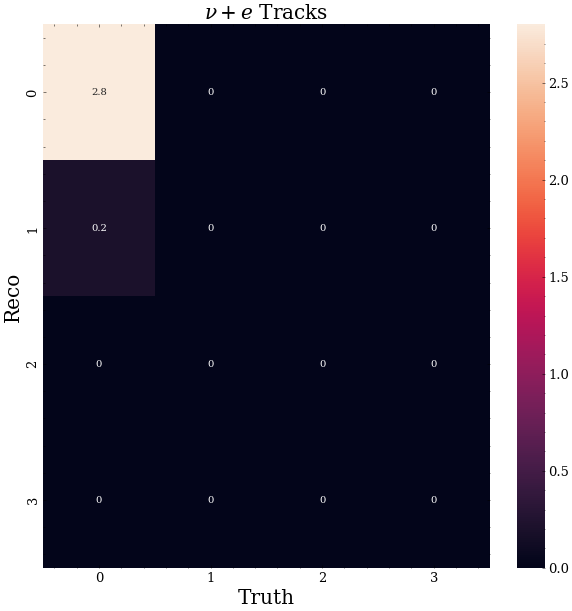

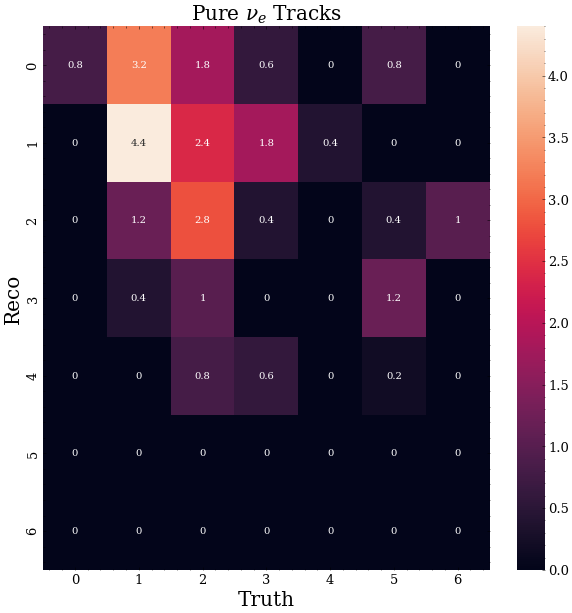

In [243]:
plt.figure(figsize=(10,10))
sns.heatmap(trkconfusion_nue_mean[:4,:4],annot=True)
plt.xlabel(r'Truth',fontsize=xls)
plt.ylabel(r'Reco',fontsize=xls)
plt.title(r'$\nu+e$ Tracks',fontsize=tls)
plotters.save_plot('nue_scat_trks_mean')

plt.figure(figsize=(10,10))
sns.heatmap(trkconfusion_nuecc_mean[:7,:7],annot=True)
plt.xlabel(r'Truth',fontsize=xls)
plt.ylabel(r'Reco',fontsize=xls)
plt.title(r'Pure $\nu_e$ Tracks',fontsize=tls)
plotters.save_plot('nuecc_trks_mean')

In [14]:
nue_truth_cuts.iloc[-2]

Unnamed: 0      3.000000
Precut          0.000000
nc              0.000000
nu+e            0.000000
pion            0.000000
proton          0.000000
pdg 3112        0.000000
pdg 321         0.000000
pdg 4122        0.000000
pdg 3222        0.000000
Etheta2 cut1    0.000000
Etheta2 cut2    0.000000
Etheta2 cut3    0.471405
POT             0.000000
Name: 3, dtype: float64

In [12]:
nue_reco_cuts.iloc[-2]

Unnamed: 0         3.000000
Precut             0.000000
showers            0.471405
tracks             0.471405
e- razzle > 0.6    0.471405
Etheta2 cut1       0.471405
Etheta2 cut2       0.471405
Etheta2 cut3       0.471405
POT                0.000000
Name: 3, dtype: float64

In [5]:
def plot_cuts(signal,background,sample,column_indeces=None):
  """Plot cut type versus events"""
  #Signal mean and std
  smean = signal.iloc[-1]
  sstd = signal.iloc[-2]

  #Background mean and std
  bmean = background.iloc[-1]
  bstd = background.iloc[-2]

  
  
  fig = plt.figure(9,7)
  ax = fig.add_subplot()

